# ** Insper - Modelagem e Simulação do Mundo Físico**

**Projeto 1 - Cannabis - THC**

**Henry Furquim Rocha e Lucas Muchaluat - Turma A**

**Modelos simples e real, implementados em Python.**

**Modelo 1 - Simples**

Esse modelo considera apenas um estoque, o estoque do Pulmão. A dose consumida foi de 13mg.

<img src="Diagrama Modelo 1.png"/, width=700, height=500 style="float: center; margin: 0px 0px 10px 10px"> 
**Figura 1: Diagrama de estoque e fluxos com 1 estoque para a análise do THC no corpo humano.**

$\frac{dP}{dt} = Consumo(t) - Ka\cdot P$

$P(t+DeltaT) = P + \frac{dP}{dt}\cdot DeltaT$

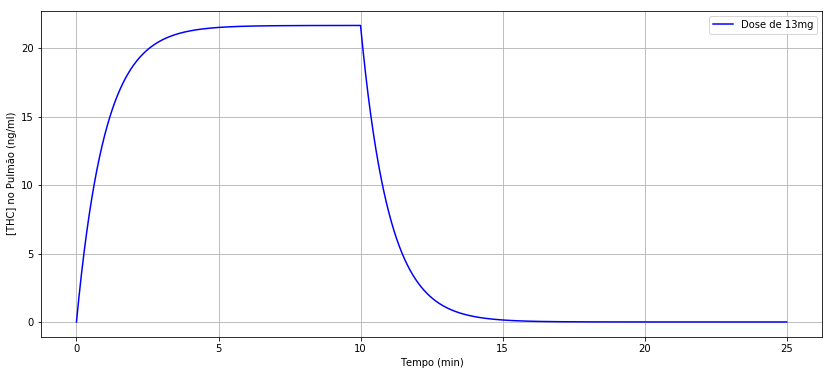

In [14]:
#Importando as bibliotecas que serão usadas pelo programa:
#===================================================================
import matplotlib.pyplot as plt
import numpy as np
#===================================================================


#Inicializando funções:
#===================================================================
def Consumo(t, Dose, Duration): #Função que determina se o usuário ainda está ingerindo a droga ou não.
    if t <= Duration:
        return Dose/Duration
    else:
        return 0
#===================================================================


#Inicializando variáveis:
#===================================================================
Dose = 13*1e6 #Dose ingerida pelo usuário, em mg.
Bioavailability = 0.05 # Biodisponibilidade de THC após consumo.
Dose = Dose*Bioavailability
Max_Time = 25 #Tempo máximo de medida, em minutos.
Delta_Time = 0.001 #Delta T, em minutos.
Duration = 10 #Duração do consumo, em minutos.
Ka = 1 #Taxa de absorção de THC pelo Pulmão, em g/s.
Lungs_Volume = 3000 #Média de volume do pulmão em ml.

Lungs = [0] #Declarando a lista de massa presente no Pulmão, com o primeiro valor sendo 0.
Lungs_Concentration = [] #Declarando a lista de concentração de THC no Pulmão.
Time = np.arange(0,Max_Time,Delta_Time) #Lista de tempo, com intervalo.
#===================================================================


#Corpo do programa:
#===================================================================
for Counter in range(1,len(Time)):
    Lungs.append(Lungs[-1] + (Consumo(Time[Counter],Dose,Duration) - Lungs[-1]*Ka)*Delta_Time)

for Mass in Lungs:
    Lungs_Concentration.append(Mass/Lungs_Volume)
    
plt.figure(figsize = [14, 6])
plt.plot(Time,Lungs_Concentration,'b',label="Dose de 13mg")  
plt.xlabel('Tempo (min)')
plt.ylabel('[THC] no Pulmão (ng/ml)')
plt.grid(True)
plt.legend()
plt.show()
#===================================================================

**Modelo 2 - Real**

Esse modelo considera todos os estoques, Pulmão e Sangue. A dose consumida nesse modelo é de 13mg.

<img src="Diagrama Modelo 2.png"/, width=700, height=500 style="float: center; margin: 0px 0px 10px 10px"> 
**Figura 2: Diagrama de estoques e fluxos com 2 estoques para a análise do THC no corpo humano.**

$\frac{dS}{dt} = Ka\cdot P - Ke\cdot S$

$S(t+DeltaT) = S + \frac{dS}{dt}\cdot DeltaT$

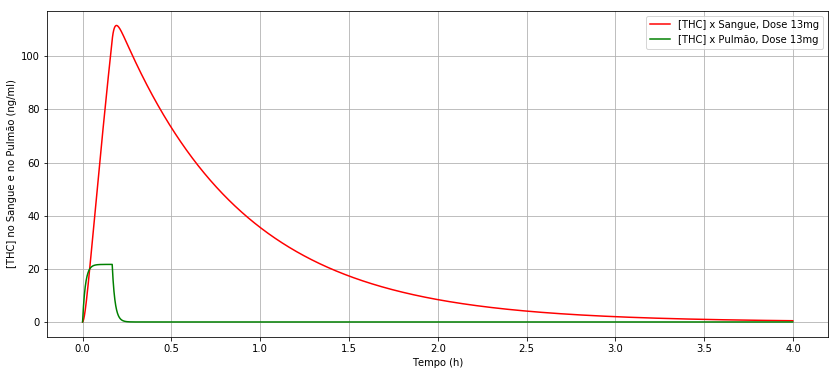

In [15]:
#Importando as bibliotecas que serão usadas pelo programa:
#===================================================================
import matplotlib.pyplot as plt
import numpy as np
#===================================================================


#Inicializando funções:
#===================================================================
def Consumo(t, Dose, Duration):  #Função que determina se o usuário ainda está ingerindo a droga ou não.
    if t <= Duration:
        return Dose/Duration
    else:
        return 0
#===================================================================


#Inicializando variáveis:
#===================================================================
Dose = 13*1e6 #Dose ingerida pelo usuário, em mg.
Bioavailability = 0.05 # Biodisponibilidade de THC após consumo.
Dose = Dose*Bioavailability
Max_Time = 240 #Tempo máximo de medida, em minutos.
Delta_Time = 0.1 #Delta T, em minutos.
Duration = 10 #Duração do consumo, em minutos.
Peak_Time = 10 #Tempo do pico de massa de THC no sangue em minutos.
Ka = 1 #Taxa de absorção de THC pelo Pulmão.
Ke = 0.024 #Taxa de eliminação de THC.
Blood_Volume = 5000 # O volume médio de sangue no corpo humano em ml.
Lungs_Volume = 3000 # O volume médio do pulmão humano em ml.

Lungs = [0] #Declarando a lista de massa de THC presente no Pulmão, com o valor inicial sendo 0.
Blood = [0] #Declarando a lista de massa de THC presente no Sangue, com o valor inicial sendo 0.
Blood_Concentration = []
Lungs_Concentration = []

Time_Minutes = np.arange(0,Max_Time,Delta_Time) #Lista de tempo, com intervalo.
Time_Hour = [] #Declarando lista de tempo em horas.
#===================================================================


#Corpo do programa:
#===================================================================
for Counter in range(1,len(Time_Minutes)): #Iniciando o Loop para o cálculo das massas.
    Lungs.append( Lungs[-1] + (Consumo(Time_Minutes[Counter],Dose,Duration) - Lungs[-1]*Ka)*Delta_Time ) #Cálculo da massa de THC no Pulmão.
    Blood.append( Blood[-1] + (Lungs[-1]*Ka - Blood[-1]*Ke)*Delta_Time ) #Cálculo da massa de THC no Sangue.
    
for Time in Time_Minutes: #Cria uma lista de tempo com as unidades em horas.
    Time_Hour.append(Time/60)

for Mass in Blood:
    Blood_Concentration.append(Mass/Blood_Volume)

for Mass in Lungs:
    Lungs_Concentration.append(Mass/Lungs_Volume)
    
plt.figure(figsize = [14, 6])
plt.plot(Time_Hour,Blood_Concentration,'r',label="[THC] x Sangue, Dose 13mg") #Adicionando uma linha de Tempo por massa de THC no Sangue ao gráfico.
plt.plot(Time_Hour,Lungs_Concentration,'g',label="[THC] x Pulmão, Dose 13mg") #Adicionando uma linha de Tempo por massa de THC no Pulmão ao gráfico.
plt.xlabel('Tempo (h)')
plt.ylabel('[THC] no Sangue e no Pulmão (ng/ml)')
plt.grid(True)
plt.legend()
plt.show()
#===================================================================

**Gráfico de Tempo por Concentração no Sangue, com diferentes doses.**

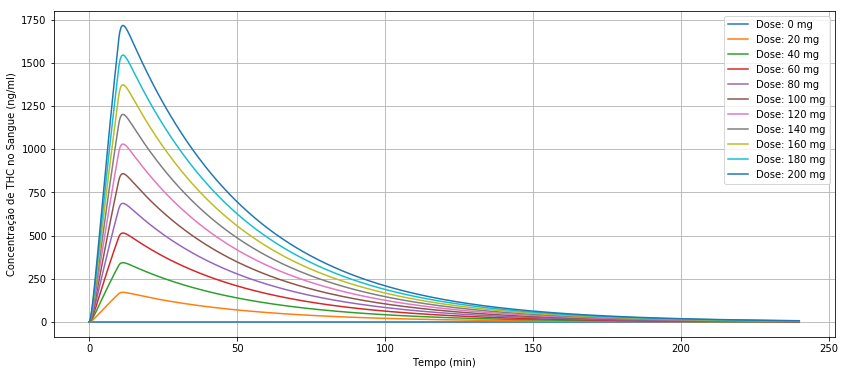

In [16]:
#Importando as bibliotecas que serão usadas pelo programa:
#===================================================================
import matplotlib.pyplot as plt
import numpy as np
#===================================================================


#Inicializando funções:
#===================================================================
def Consumo(t, Dose, Duration):  #Função que determina se o usuário ainda está ingerindo a droga ou não.
    if t <= Duration:
        return Dose/Duration
    else:
        return 0
#===================================================================


#Inicializando variáveis:
#===================================================================
Bioavailability = 0.05 # Biodisponibilidade de THC após consumo.
Max_Dose = 200 #Dose máxima em mg.
Dose_Interval = 20 #Intervalo de doses, em mg.
Max_Time = 240 #Tempo máximo de medida, em minutos.
Delta_Time = 0.1 #Delta T, em minutos.
Duration = 10 #Duração do consumo, em minutos.
Peak_Time = 10 #Tempo do pico de massa de THC no Sangue.
Ka = 1 #Taxa de absorção de THC pelo Pulmão.
Ke = 0.024 #Taxa de eliminação de THC.

Doses = np.arange(0,Max_Dose+1,Dose_Interval) #Lista com todas as doses possíveis, de 0mg até 200mg.
Time_Minutes = np.arange(0,Max_Time,Delta_Time) #Lista de tempo, com intervalo.
Time_To_Pass_Detection = [] #Declarando a lista de tempo para que o THC não seja mais detectável pelo teste sanguíneo.
Time_Hour = [] #Declarando lista de tempo em horas.
#===================================================================


#Corpo do programa:
#===================================================================
plt.figure(figsize = [14, 6])
for Dose in Doses:
    Dose_MG = Dose
    Dose = Dose*1e6*Bioavailability
    Lungs = [0] #Declarando a lista de massa de THC presente no Pulmão, com o valor inicial sendo 0.
    Blood = [0] #Declarando a lista de massa de THC presente no Sangue, com o valor inicial sendo 0.
    Blood_Concentration = []
    for Counter in range(1,len(Time_Minutes)): #Iniciando o Loop para o cálculo das massas.
        Lungs.append( Lungs[-1] + (Consumo(Time_Minutes[Counter],Dose,Duration) - Lungs[-1]*Ka)*Delta_Time ) #Cálculo da massa de THC no Pulmão.
        Blood.append( Blood[-1] + (Lungs[-1]*Ka - Blood[-1]*Ke)*Delta_Time ) #Cálculo da massa de THC no Sangue.
    for Mass in Blood:
        Blood_Concentration.append(Mass/Blood_Volume)
    plt.plot(Time_Minutes,Blood_Concentration,'',label="Dose: %1.f mg"%Dose_MG) #Adicionando uma linha de Tempo por massa de THC no Sangue ao gráfico.

plt.xlabel('Tempo (min)')
plt.ylabel('Concentração de THC no Sangue (ng/ml)')
plt.grid(True)
plt.legend()
plt.show()
#===================================================================

**Gráfico de Tempo de espera para que a droga não seja detectada no corpo do usuário.**

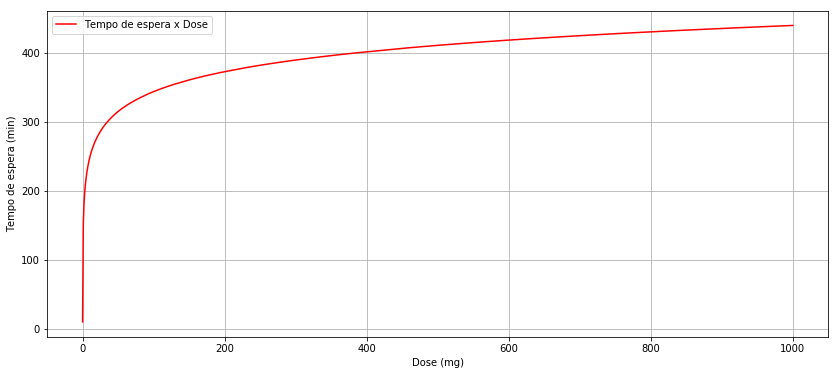

In [7]:
#Importando as bibliotecas que serão usadas pelo programa:
#===================================================================
import matplotlib.pyplot as plt
import numpy as np
#===================================================================


#Inicializando funções:
#===================================================================
def Consumo(t, Dose, Duration):  #Função que determina se o usuário ainda está ingerindo a droga ou não.
    if t <= Duration:
        return Dose/Duration
    else:
        return 0
#===================================================================


#Inicializando variáveis:
#===================================================================
Bioavailability = 0.05 # Biodisponibilidade de THC após consumo.
Max_Dose = 1000 #Dose máxima em mg.
Dose_Interval = 1 #Intervalo de doses, em mg.
Max_Time = 900 #Tempo máximo de medida, em minutos.
Delta_Time = 0.1 #Delta T, em minutos.
Duration = 10 #Duração do consumo, em minutos.
Peak_Time = 10 #Tempo do pico de massa de THC no Sangue.
Ka = 1 #Taxa de absorção de THC pelo Pulmão.
Ke = 0.024 #Taxa de eliminação de THC.
Test_Detection_Limit = 1500 #Limite de detecção do teste sanguíneo para THC no Sangue em ng. 0.3ng/ml para 5000ml.

Doses = np.arange(0,Max_Dose+1,Dose_Interval) #Lista com todas as doses possíveis, de 0mg até 1000mg.
Time_Minutes = np.arange(0,Max_Time,Delta_Time) #Lista de tempo, com intervalo.
Time_To_Pass_Detection = [] #Declarando a lista de tempo para que o THC não seja mais detectável pelo teste sanguíneo.
Time_Hour = [] #Declarando lista de tempo em horas.
#===================================================================


#Corpo do programa:
#===================================================================
for Dose in Doses:
    Lungs = [0] #Declarando a lista de massa de THC presente no Pulmão, com o valor inicial sendo 0.
    Blood = [0] #Declarando a lista de massa de THC presente no Sangue, com o valor inicial sendo 0.
    Dose = Dose*1e6*Bioavailability
    is_At_Limit = False 
    for Counter in range(1,len(Time_Minutes)): #Iniciando o Loop para o cálculo das massas.
        Lungs.append( Lungs[-1] + (Consumo(Time_Minutes[Counter],Dose,Duration) - Lungs[-1]*Ka)*Delta_Time ) #Cálculo da massa de THC no Pulmão.
        Blood.append( Blood[-1] + (Lungs[-1]*Ka - Blood[-1]*Ke)*Delta_Time ) #Cálculo da massa de THC no Sangue.
        if Time_Minutes[Counter] >= Peak_Time: #Inicia a cheacagem do limite de detecção após o tempo de pico de massa de THC no Sangue.
            if Blood[-1] <= Test_Detection_Limit and is_At_Limit == False: #Checa se o limite de detecção for atingido.
                is_At_Limit = True
                Time_To_Pass_Detection.append(Time_Minutes[Counter])
    
for Time in Time_To_Pass_Detection: #Cria uma lista de tempo com as unidades em horas.
    Time_Hour.append(Time/60)

plt.figure(figsize = [14, 6])
plt.plot(Doses,Time_To_Pass_Detection,'r',label="Tempo de espera x Dose") #Adicionando uma linha de Tempo de espera para passar no teste sanguíneo por dose.
plt.xlabel('Dose (mg)')
plt.ylabel('Tempo de espera (min)')
plt.grid(True)
plt.legend()
plt.show()
#===================================================================